In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("C:\\Users\\DELL\\Numpy\df.csv")
data

,user_id,status_id,screen_name,account.type,class_type
0,343587159,1175975242164068352,human#1,human,human
1,18839785,1216367699028140034,human#11,human,human
2,262794965,1073395310406250496,human#8,human,human
3,14260960,1235202464959340544,human#9,human,human
4,1110407881030017024,1199674264472834048,bot#9,bot,others
...,...,...,...,...,...
2297,705113652471439361,714523361305608192,bot#16,bot,rnn
2298,262794965,935057601103933441,human#8,human,human
2299,343587159,1158520796039405569,human#1,human,human
2300,1110407881030017024,1210364706457677824,bot#9,bot,others


In [4]:
data.describe

<bound method NDFrame.describe of                   user_id            status_id screen_name account.type  \
0               343587159  1175975242164068352     human#1        human   
1                18839785  1216367699028140034    human#11        human   
2               262794965  1073395310406250496     human#8        human   
3                14260960  1235202464959340544     human#9        human   
4     1110407881030017024  1199674264472834048       bot#9          bot   
...                   ...                  ...         ...          ...   
2297   705113652471439361   714523361305608192      bot#16          bot   
2298            262794965   935057601103933441     human#8        human   
2299            343587159  1158520796039405569     human#1        human   
2300  1110407881030017024  1210364706457677824       bot#9          bot   
2301  1213988022728810496  1219363974657052675       bot#8          bot   

     class_type  
0         human  
1         human  
2         h

In [5]:
data.values

array([['343587159', '1175975242164068352', 'human#1', 'human', 'human'],
       ['18839785', '1216367699028140034', 'human#11', 'human', 'human'],
       ['262794965', '1073395310406250496', 'human#8', 'human', 'human'],
       ...,
       ['343587159', '1158520796039405569', 'human#1', 'human', 'human'],
       ['1110407881030017024', '1210364706457677824', 'bot#9', 'bot',
        'others'],
       ['1213988022728810496', '1219363974657052675', 'bot#8', 'bot',
        'gpt2']], dtype=object)

In [6]:
data.info

<bound method DataFrame.info of                   user_id            status_id screen_name account.type  \
0               343587159  1175975242164068352     human#1        human   
1                18839785  1216367699028140034    human#11        human   
2               262794965  1073395310406250496     human#8        human   
3                14260960  1235202464959340544     human#9        human   
4     1110407881030017024  1199674264472834048       bot#9          bot   
...                   ...                  ...         ...          ...   
2297   705113652471439361   714523361305608192      bot#16          bot   
2298            262794965   935057601103933441     human#8        human   
2299            343587159  1158520796039405569     human#1        human   
2300  1110407881030017024  1210364706457677824       bot#9          bot   
2301  1213988022728810496  1219363974657052675       bot#8          bot   

     class_type  
0         human  
1         human  
2         hum

In [7]:
data["class_type"].unique()

array(['human', 'others', 'gpt2', 'rnn'], dtype=object)

In [8]:
data.columns

Index(['user_id', 'status_id', 'screen_name', 'account.type', 'class_type'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
v=['user_id', 'status_id', 'screen_name', 'account.type', 'class_type']
v
for i in v:
    data[i]=le.fit_transform(data[i])
data

,user_id,status_id,screen_name,account.type,class_type
0,30,699,23,1,1
1,25,1534,25,1,1
2,27,164,38,1,1
3,19,1935,39,1,1
4,4,1071,22,0,2
...,...,...,...,...,...
2297,33,2059,7,0,3
2298,27,2192,38,1,1
2299,30,540,23,1,1
2300,4,1381,22,0,2


In [10]:
x=data.drop("class_type",axis=1)
x


,user_id,status_id,screen_name,account.type
0,30,699,23,1
1,25,1534,25,1
2,27,164,38,1
3,19,1935,39,1
4,4,1071,22,0
...,...,...,...,...
2297,33,2059,7,0
2298,27,2192,38,1
2299,30,540,23,1
2300,4,1381,22,0


In [11]:
y=data["class_type"]
y


0       1
1       1
2       1
3       1
4       2
       ..
2297    3
2298    1
2299    1
2300    2
2301    0
Name: class_type, Length: 2302, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2) 

In [13]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy=(regr.score(xtest,ytest)*100)
accuracy


41.29837352498771

In [17]:
ypredict=regr.predict(xtest)
ypredict

array([0.96668179, 2.5009455 , 0.88292117, 0.76629565, 0.98968886,
       1.74683678, 1.11061776, 2.16554442, 0.60475074, 1.33628602,
       0.28062142, 1.00263393, 1.01868377, 1.16198823, 0.99921787,
       2.57807656, 0.76461758, 1.77627423, 1.34191953, 1.27484982,
       1.23610063, 1.00290349, 2.46940713, 1.0988713 , 1.08884374,
       1.24440493, 1.06259401, 1.09294785, 1.57312293, 1.62232619,
       1.07565894, 0.77174936, 1.09771416, 1.75660552, 2.57274271,
       1.1768511 , 1.11553209, 0.7846345 , 1.2631633 , 1.29968731,
       0.52162659, 1.11397389, 1.11733002, 2.56517669, 0.99819905,
       1.10772262, 2.56662976, 1.13169498, 1.34323801, 1.36330078,
       1.40698841, 1.5542447 , 1.30232427, 0.76377752, 1.75828358,
       1.61525435, 1.08781084, 1.01378747, 2.57118451, 2.46958692,
       1.08658547, 1.1137941 , 1.1815257 , 1.1037066 , 1.23442154,
       2.58041386, 2.57280264, 0.7497537 , 1.09881137, 1.09993096,
       2.49045759, 1.09166049, 1.24101497, 1.12120707, 0.76689

In [18]:
mse=mean_squared_error(ytest, ypredict)
mse

0.4914428871704061

In [19]:
r2 = r2_score(ytest, ypredict)
r2

0.4129837352498771

In [20]:
predict=(regr.score(xtrain,ytrain)*100)
predict

35.648114055043564

In [21]:
w=[[25,762,25,1]]
v=regr.predict(w)
v

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.15635473])

In [22]:
data["class_type"].unique()


array([1, 2, 0, 3])

In [23]:
if v>=1:
    print("human")
elif v>=3:
    print("rnn")
elif v>=2:
    print("others")
else:
    print("gpt2")

human


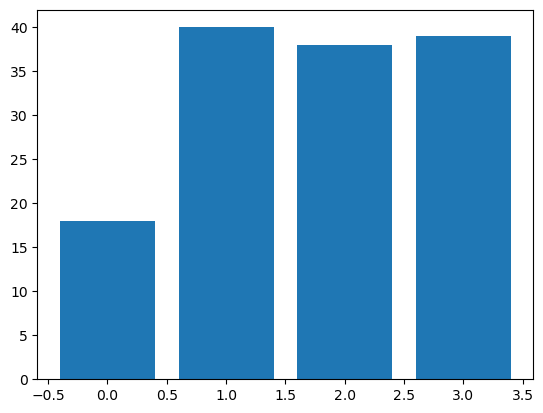

In [24]:
import matplotlib.pyplot as plt
x=data["class_type"]
y=data["user_id"]
plt.bar(x,y)
plt.plot()
plt.show()